-------------------TASK 1--------------------

--- Dataset General Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flight_id             5000 non-null   int64  
 1   flight_duration       5000 non-null   float64
 2   passenger_count       5000 non-null   int64  
 3   adult_passengers      5000 non-null   int64  
 4   child_passengers      5000 non-null   int64  
 5   business_class_ratio  5000 non-null   float64
 6   is_international      5000 non-null   int64  
 7   total_food_demand     5000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.6 KB
None

--- Null Value Control ---
flight_id               0
flight_duration         0
passenger_count         0
adult_passengers        0
child_passengers        0
business_class_ratio    0
is_international        0
total_food_demand       0
dtype: int64

--- General Statistics ---
                     

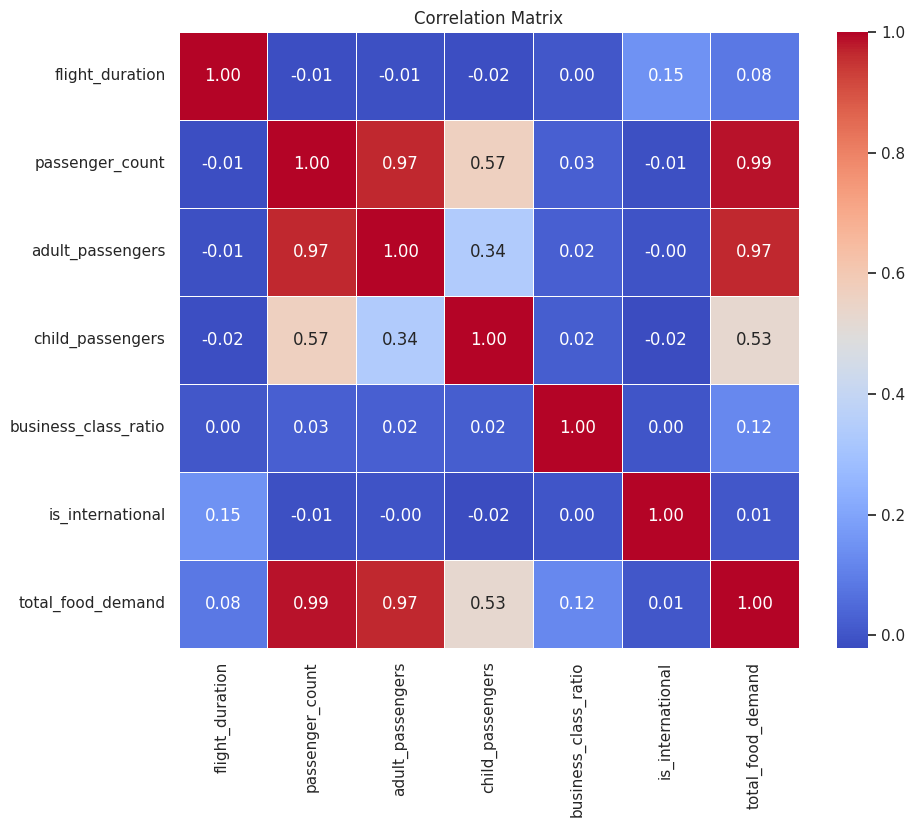

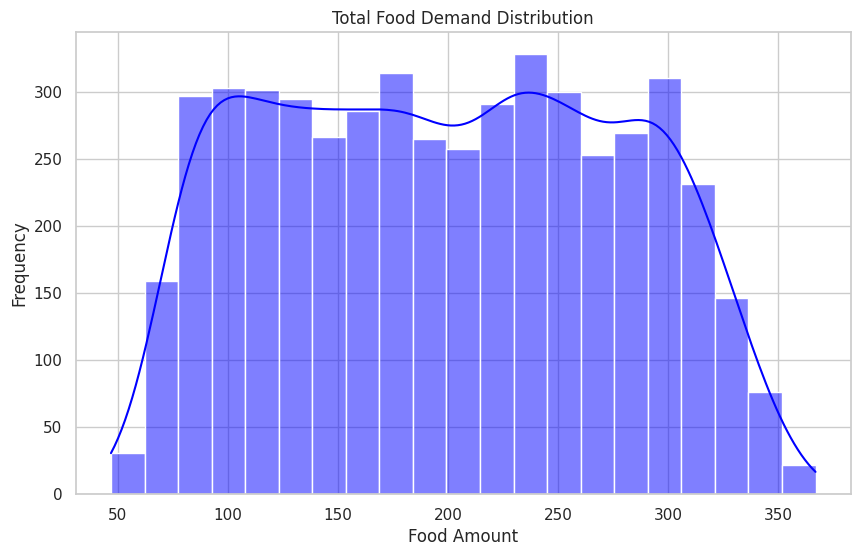

/tmp/ipython-input-54917742.py:32: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='passenger_count', y='total_food_demand', data=df, palette='viridis')


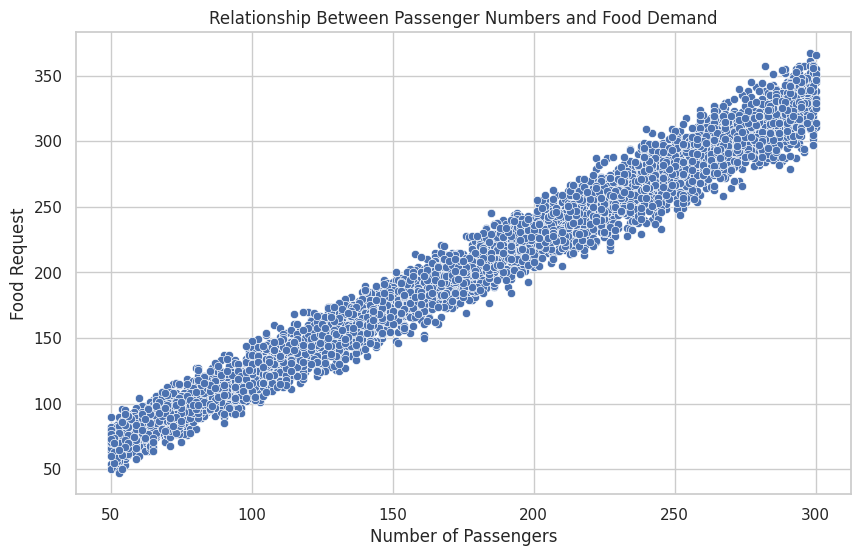

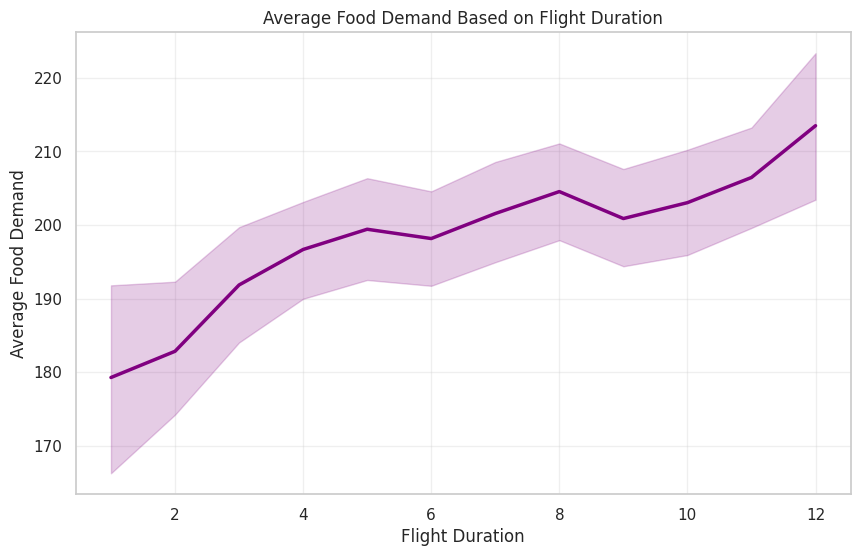

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('airline_food_data_last.csv')

print("--- Dataset General Info ---")
print(df.info())

print("\n--- Null Value Control ---")
print(df.isnull().sum())

print("\n--- General Statistics ---")
print(df.describe().T)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
correlation = df.drop('flight_id', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['total_food_demand'], kde=True, color='blue')
plt.title('Total Food Demand Distribution')
plt.xlabel('Food Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='total_food_demand', data=df, palette='viridis')
plt.title('Relationship Between Passenger Numbers and Food Demand')
plt.xlabel('Number of Passengers')
plt.ylabel('Food Request')
plt.show()

plt.figure(figsize=(10, 6))
df['duration_rounded'] = df['flight_duration'].round()

sns.lineplot(
    x='duration_rounded',
    y='total_food_demand',
    data=df,
    color='purple',
    linewidth=2.5
)

plt.title('Average Food Demand Based on Flight Duration')
plt.xlabel('Flight Duration')
plt.ylabel('Average Food Demand')
plt.grid(True, alpha=0.3)
plt.show()

------------------TASK 2 Baseline Model--------------------

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('airline_food_data_last.csv')
X = df.drop(['total_food_demand', 'flight_id'], axis=1)
y = df['total_food_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_mean = y_train.mean()
print(f"Train mean: {train_mean:.2f}")

y_pred_baseline = np.full(shape=y_test.shape, fill_value=train_mean)

baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_mse = mean_squared_error(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2 = r2_score(y_test, y_pred_baseline)

print(f"R²       : {baseline_r2:.5f}")
print(f"MAE      : {baseline_mae:.2f}")
print(f"RMSE     : {baseline_rmse:.2f}")


Train mean: 199.60
R²       : -0.00088
MAE      : 66.93
RMSE     : 76.92


---------------TASK 3 Linear Regression Model--------------------

R²      : 0.9937
MAE     : 4.8849
RMSE    : 6.0855
                Özellik    Katsayı
0       flight_duration   2.549395
1       passenger_count   0.650839
2      adult_passengers   0.428456
3      child_passengers   0.222383
4  business_class_ratio  87.898261
5      is_international   0.070784


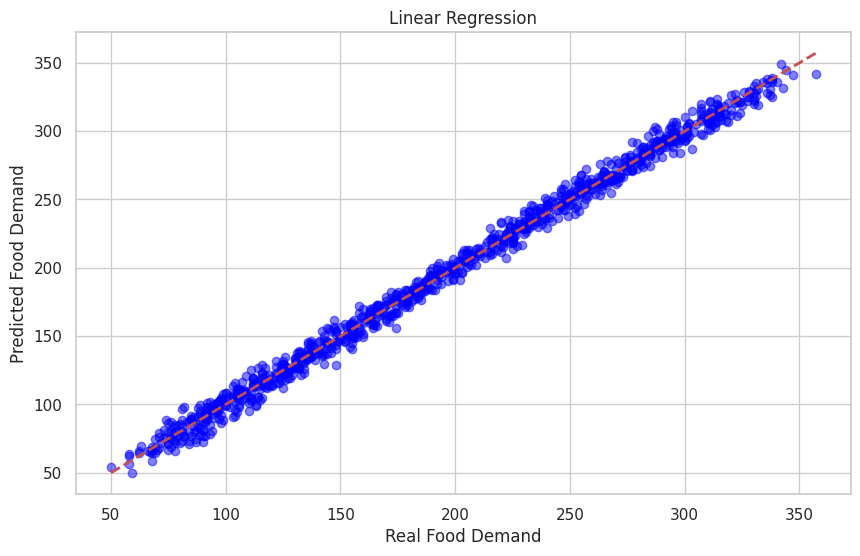

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('airline_food_data_last.csv')

X = df.drop(['flight_id', 'total_food_demand'], axis=1)
y = df['total_food_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²      : {r2:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"RMSE    : {rmse:.4f}")

feature_importance = pd.DataFrame({'Özellik': X.columns, 'Katsayı': lr_model.coef_})
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Real Food Demand')
plt.ylabel('Predicted Food Demand')
plt.title('Linear Regression')
plt.grid(True)
plt.show()

---------------- TASK 4 Random Forest Model--------------------

R²      : 0.9941
MAE     : 4.73
RMSE    : 5.92


/tmp/ipython-input-1515838844.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


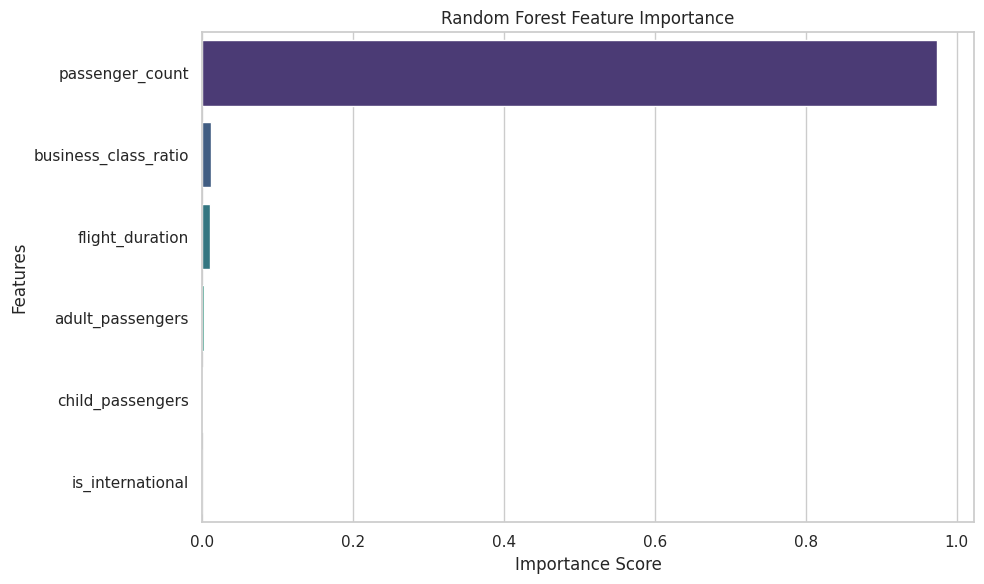

                Feature  Importance
1       passenger_count    0.974400
4  business_class_ratio    0.011358
0       flight_duration    0.010501
2      adult_passengers    0.002612
3      child_passengers    0.000977
5      is_international    0.000152


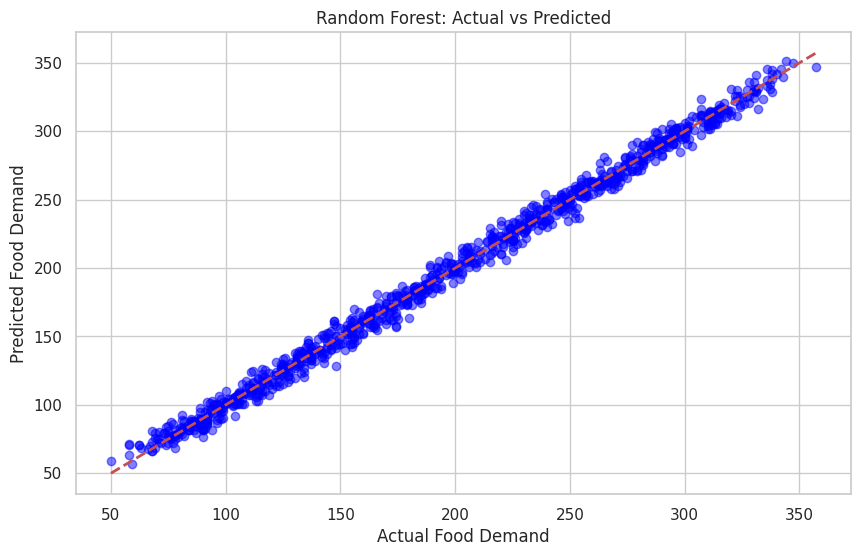

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('airline_food_data_last.csv')

df.head()

X = df.drop(['flight_id', 'total_food_demand'], axis=1)
y = df['total_food_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=28)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))


print(f"R²      : {rf_r2:.4f}")
print(f"MAE     : {rf_mae:.2f}")
print(f"RMSE    : {rf_rmse:.2f}")

importances = rf_model.feature_importances_
feature_names = X.columns

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print(feature_imp_df)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Food Demand')
plt.ylabel('Predicted Food Demand')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()

-------------- TASK 5 ------------------


  ---Model Performance Comparison---
            Model      R²     MAE    RMSE
    Random Forest  0.9941  4.7342  5.9194
Linear Regression  0.9937  4.8849  6.0855
         Baseline -0.0009 66.9259 76.9205


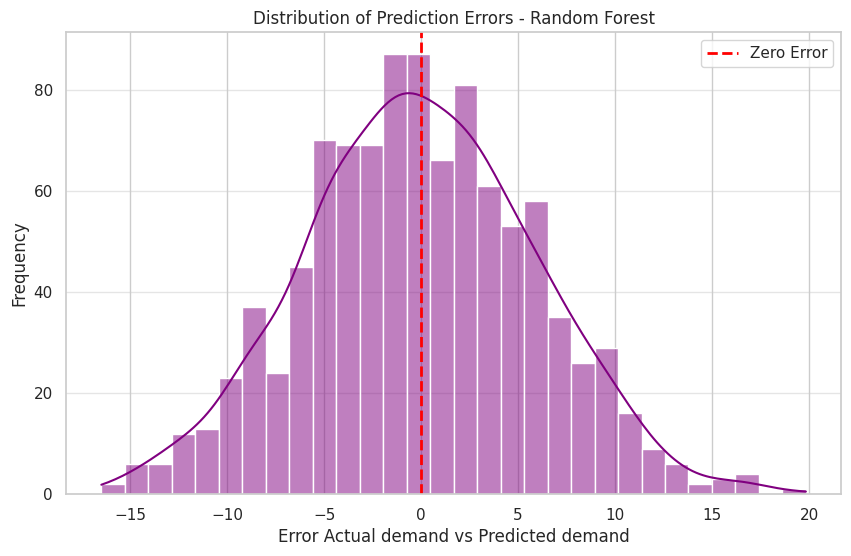

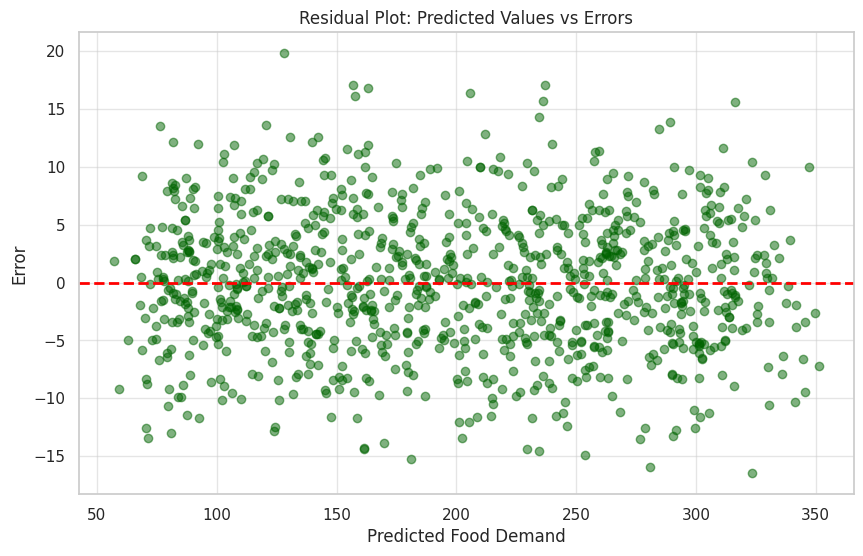

In [16]:

#Baseline
baseline_r2 = r2_score(y_test, y_pred_baseline)
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

#Linear Regression
lr_r2 = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#Random Forest
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

comparison_data = {
    'Model': ['Baseline', 'Linear Regression', 'Random Forest'],
    'R²': [baseline_r2, lr_r2, rf_r2],
    'MAE': [baseline_mae, lr_mae, rf_mae],
    'RMSE': [baseline_rmse, lr_rmse, rf_rmse]
}

df_comparison = pd.DataFrame(comparison_data)

df_comparison = df_comparison.sort_values(by='R²', ascending=False)

print("\n  ---Model Performance Comparison---")
print(df_comparison.round(4).to_string(index=False))

residuals = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Distribution of Prediction Errors - Random Forest')
plt.xlabel('Error Actual demand vs Predicted demand')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5, color='darkgreen')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot: Predicted Values vs Errors')
plt.xlabel('Predicted Food Demand')
plt.ylabel('Error')
plt.grid(True, alpha=0.5)
plt.show()